#한글처리

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


런타임 다시 시작

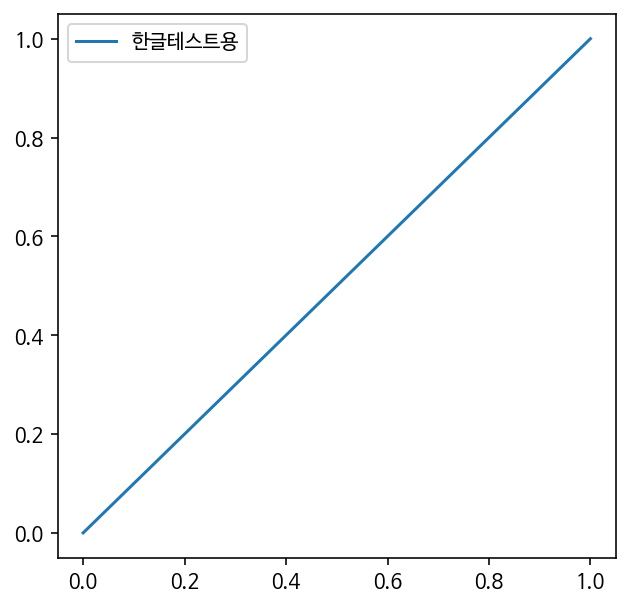

In [2]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

#자율학습 모델

In [3]:
import numpy as np

groundtruth = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1],
])
groundtruth

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1]])

In [4]:
import numpy as np

clustering = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
])
clustering


array([[1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1]])

In [5]:
incidence = 1 * (groundtruth == clustering)  # 1*는 True/False를 숫자 0/1로 바꾸기 위한 계산 
incidence


array([[1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1]])

In [ ]:
np.fill_diagonal(incidence, 0) # 대각성분 제외
a_plus_b = np.sum(incidence) / 2 # 대칭행렬이므로 절반만 센다.
a_plus_b


6.0

In [ ]:
from scipy.special import comb
rand_index = a_plus_b / comb(incidence.shape[0], 2)
rand_index


0.6

##군집화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


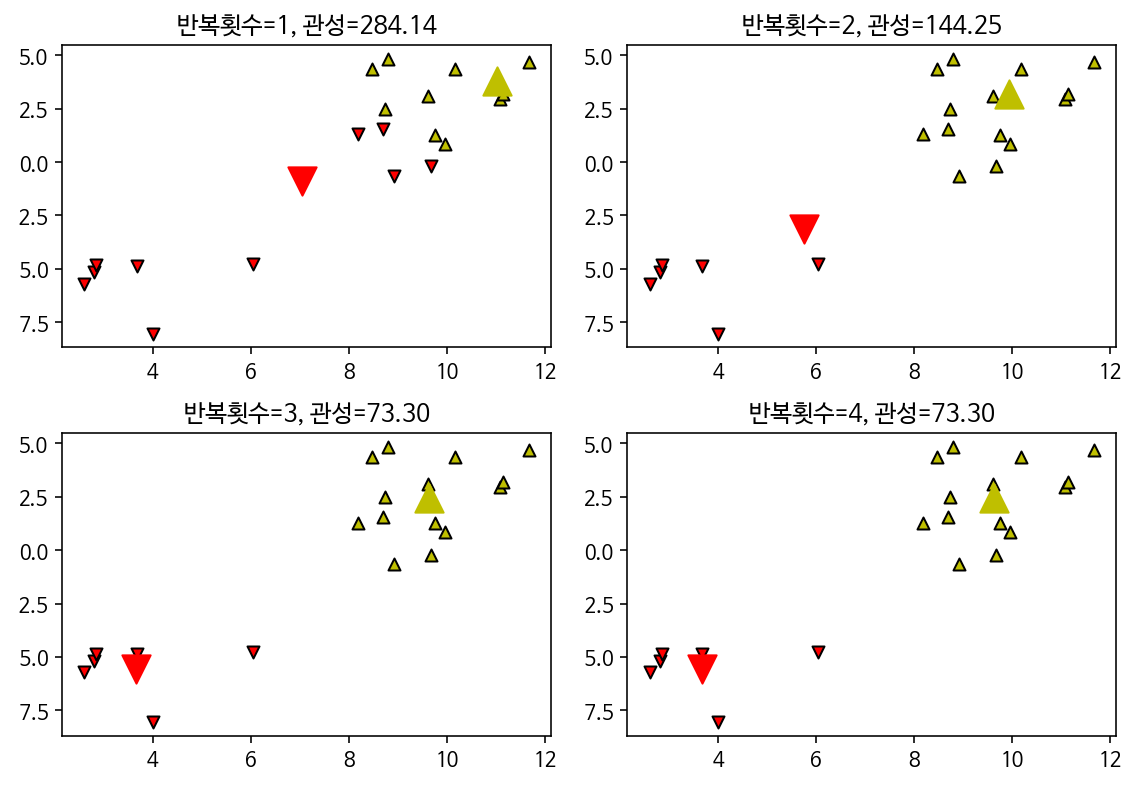

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("반복횟수={}, 관성={:5.2f}".format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

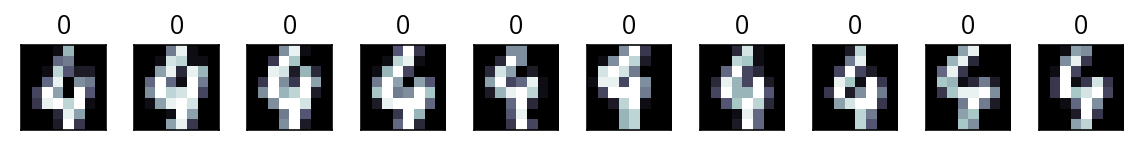

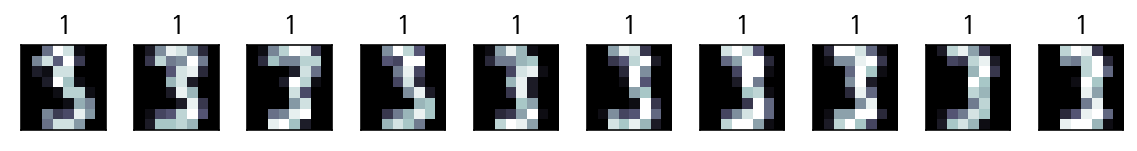

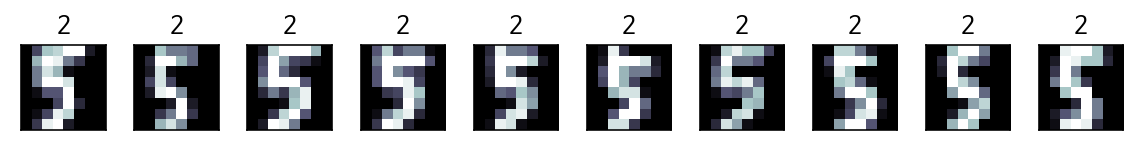

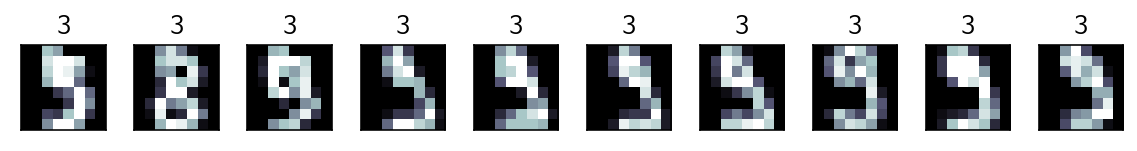

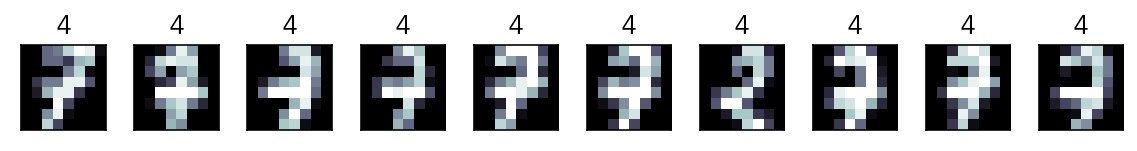

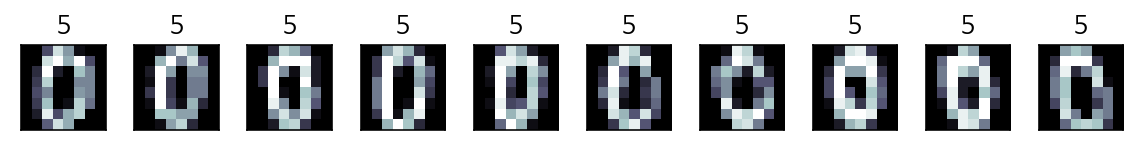

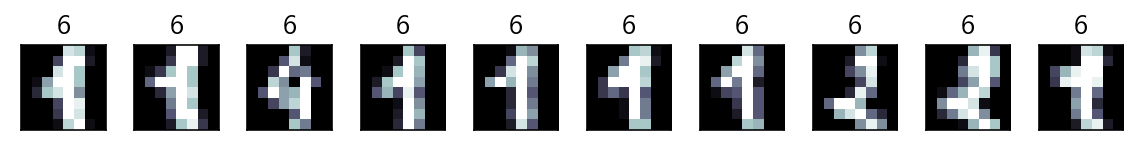

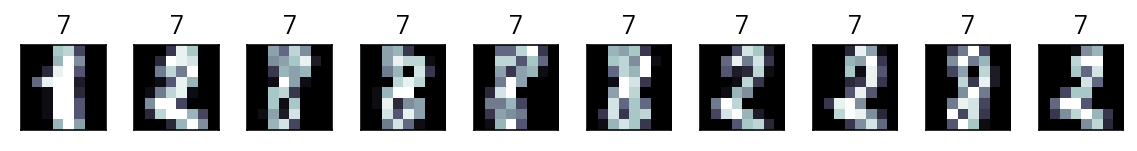

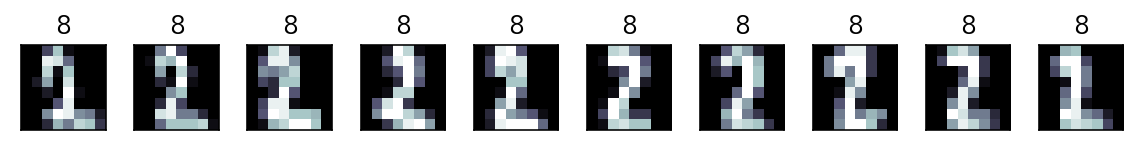

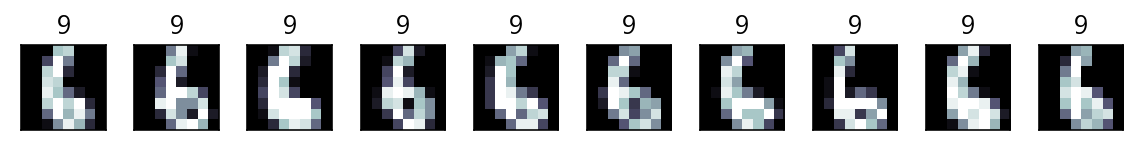

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    
for i in range(10):
    show_cluster(digits.images, y_pred, i)


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)


array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]])

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))


ARI: 0.668699122362767
AMI: 0.7443265633359026
Silhouette Score: 0.18251916424600556


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


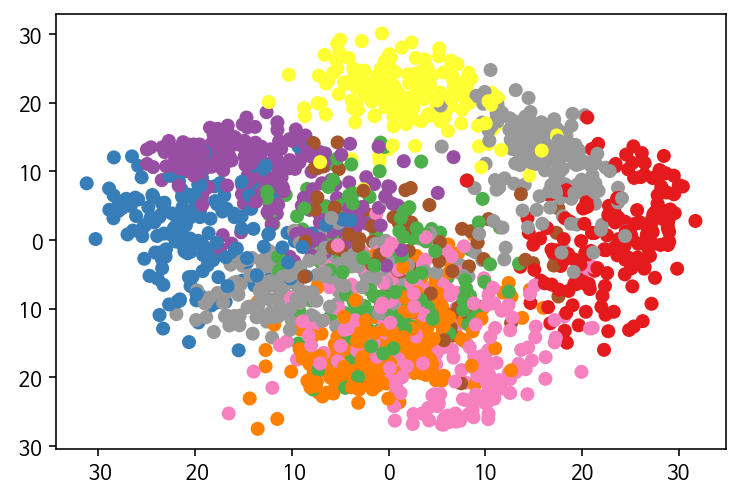

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [ ]:
%%time
model1 = KMeans(n_clusters=3).fit(X)

CPU times: user 1.8 s, sys: 387 ms, total: 2.19 s
Wall time: 2.62 s


In [ ]:
%%time
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

CPU times: user 95.8 ms, sys: 5.39 ms, total: 101 ms
Wall time: 139 ms


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


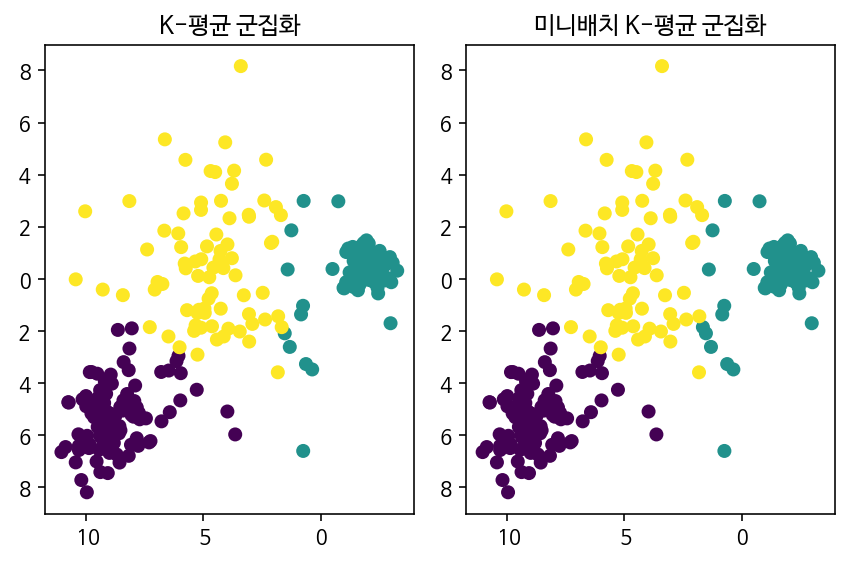

In [ ]:
import numpy as np

idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("K-평균 군집화")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("미니배치 K-평균 군집화")
plt.tight_layout()
plt.show()


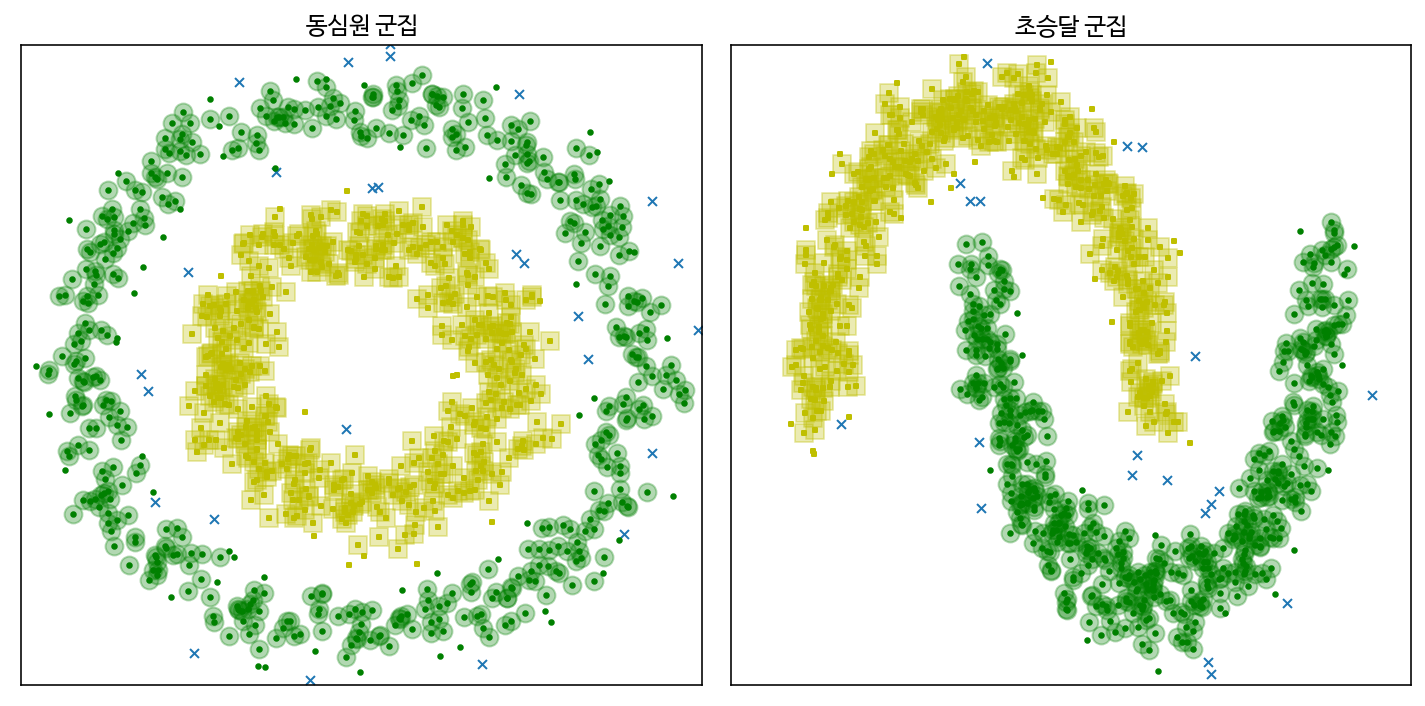

In [ ]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("동심원 군집", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("초승달 군집", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

print("동심원 군집 ARI:", adjusted_rand_score(y1, y_pred1))
print("동심원 군집 AMI:", adjusted_mutual_info_score(y1, y_pred1))
print("초승달 군집 ARI:", adjusted_rand_score(y2, y_pred2))
print("초승달 군집 AMI:", adjusted_mutual_info_score(y2, y_pred2))


동심원 군집 ARI: 0.9414262371038592
동심원 군집 AMI: 0.8967648464619998
초승달 군집 ARI: 0.9544844153926417
초승달 군집 AMI: 0.9151495815452476


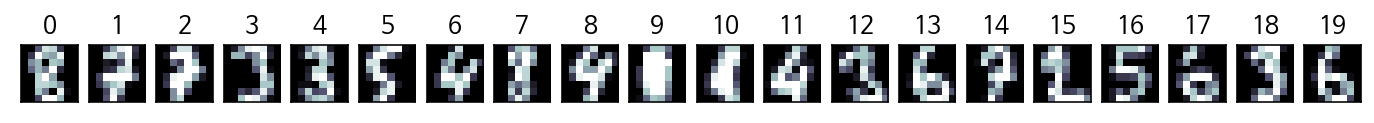

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
n_image = 20
np.random.seed(0)
idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]

plt.figure(figsize=(12, 1))
for i in range(n_image):
    plt.subplot(1, n_image, i + 1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')
Z


array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

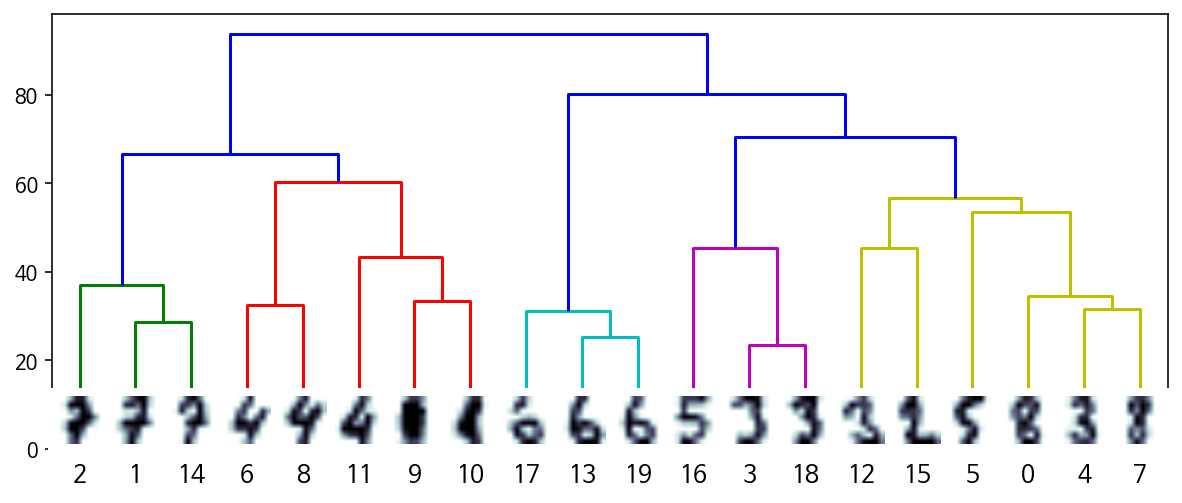

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10, 4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata["dcoord"])
icoord = np.array(ddata["icoord"])
leaves = np.array(ddata["leaves"])
idx = np.argsort(dcoord[:, 2])
dcoord = dcoord[idx, :]
icoord = icoord[idx, :]
idx = np.argsort(Z[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], cmap=plt.cm.bone_r, interpolation="bilinear", zoom=3)
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.show()


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import *

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

model = AffinityPropagation(preference=-50).fit(X)

cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels, metric='sqeuclidean'))


Estimated number of clusters: 3
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


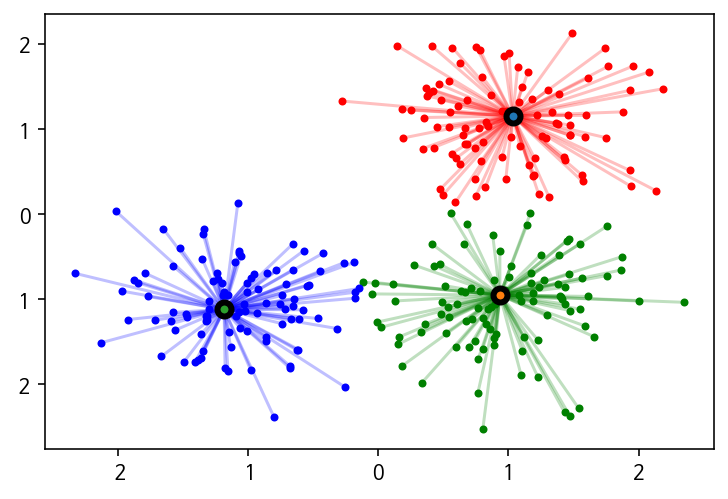

In [ ]:
from itertools import cycle

colors = cycle('rgb')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.show()


##  10.1 K-means

### 10.1.4 K-means 실습

#####  예제 1

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# generate sample data
# set seed (random number generator)
np.random.seed(0)
# set centers
centers = [[1, 1], [0, 0], [2, -1]]

# n_samples : the total 
# centers : the number of centers to generate
# cluster_std : fixed center locations
data, labels_true = make_blobs(n_samples = 2000, centers = centers, 
                               cluster_std = 0.7)

In [ ]:
data.shape

(2000, 2)

In [ ]:
print(data)
print()
print(labels_true)
print(np.unique(labels_true))

[[ 2.88735684  0.94825273]
 [ 0.00712986  1.53880744]
 [ 0.3264657  -0.06607475]
 ...
 [ 0.53901292  0.64003622]
 [ 1.65065358  1.40755721]
 [ 0.74131908 -0.71579507]]

[0 1 1 ... 0 0 1]
[0 1 2]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


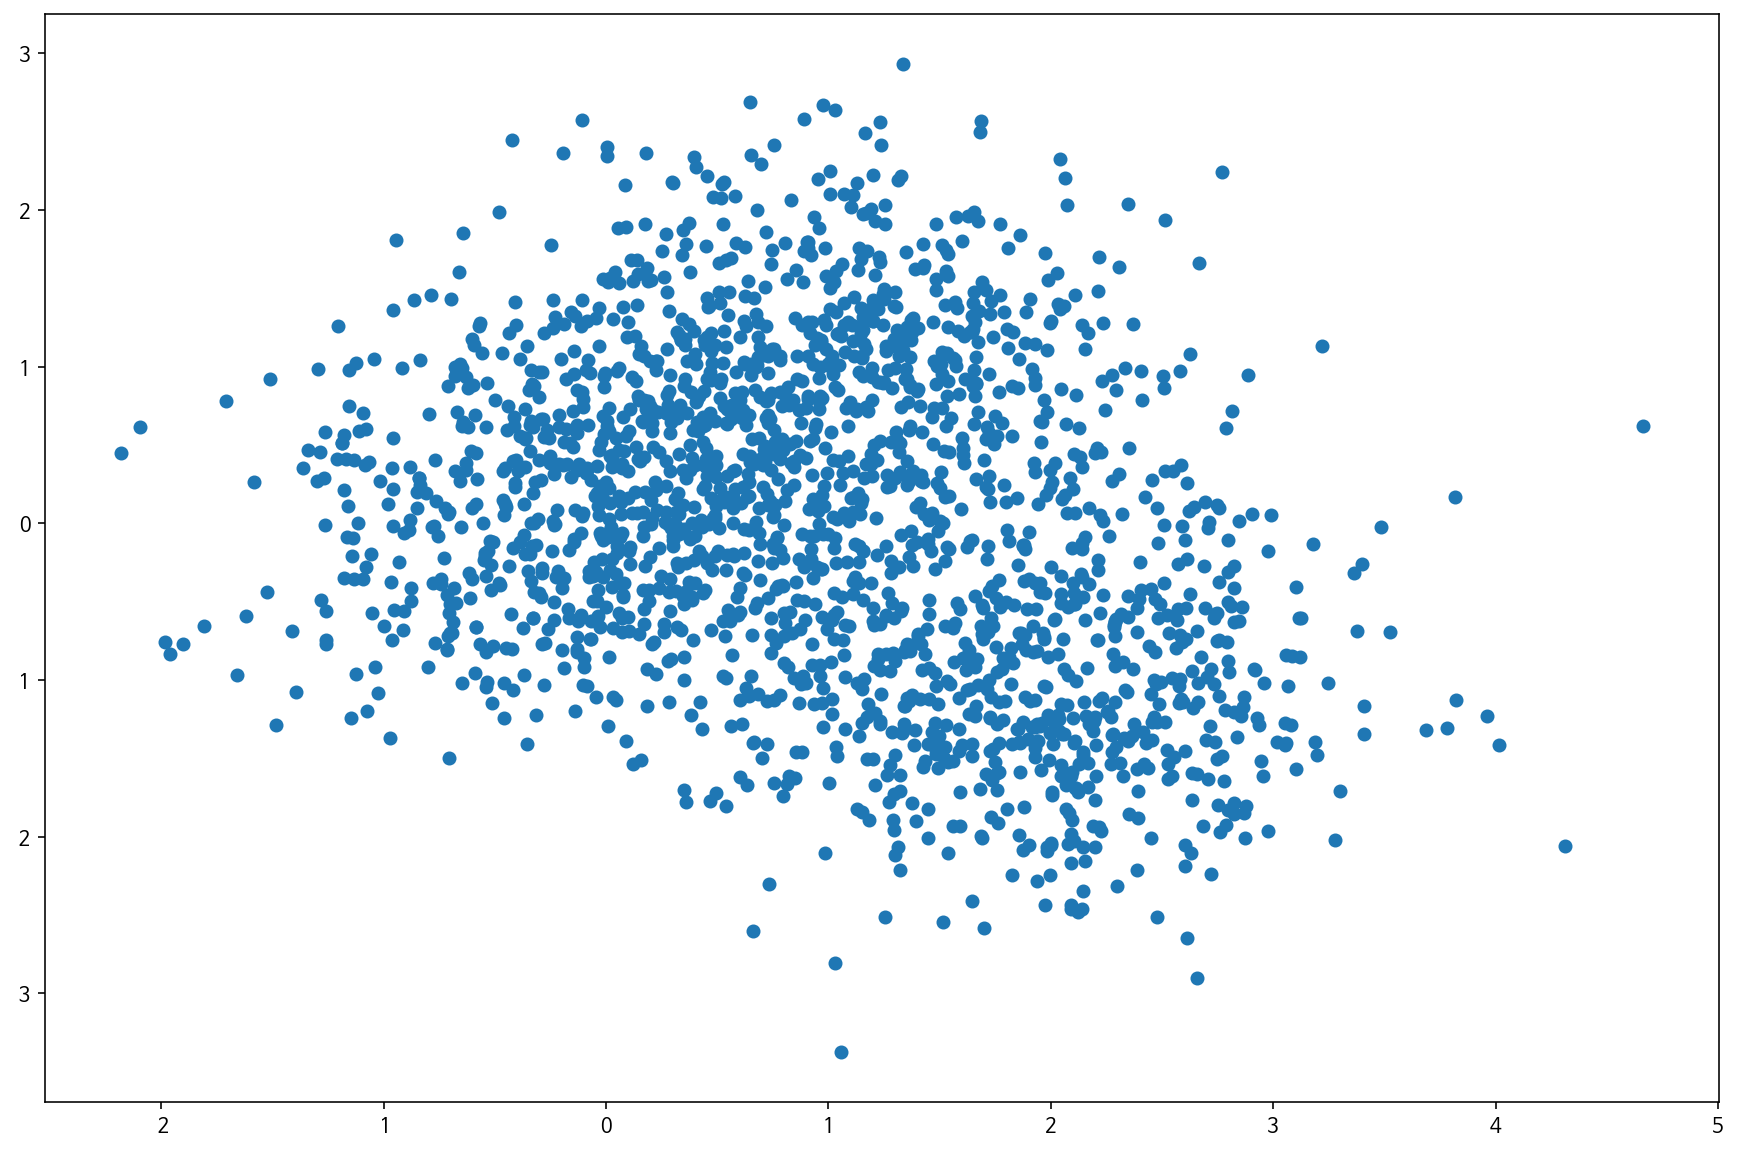

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data[:,0], data[:,1])

In [ ]:
# compute clustering with KMeans
estimator = KMeans(init = 'k-means++', n_clusters = 3, n_init = 10)
estimator.fit(data)

KMeans(n_clusters=3)

In [ ]:
labels_predict = estimator.labels_
np.unique(labels_predict)

array([0, 1, 2], dtype=int32)

In [ ]:
# normalize into [0,1]
cm = plt.cm.get_cmap('jet')
scaled_labels = (labels_predict - np.min(labels_predict)) 
scaled_labels = scaled_labels /(np.max(labels_predict) - np.min(labels_predict))
np.unique(scaled_labels)

array([0. , 0.5, 1. ])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


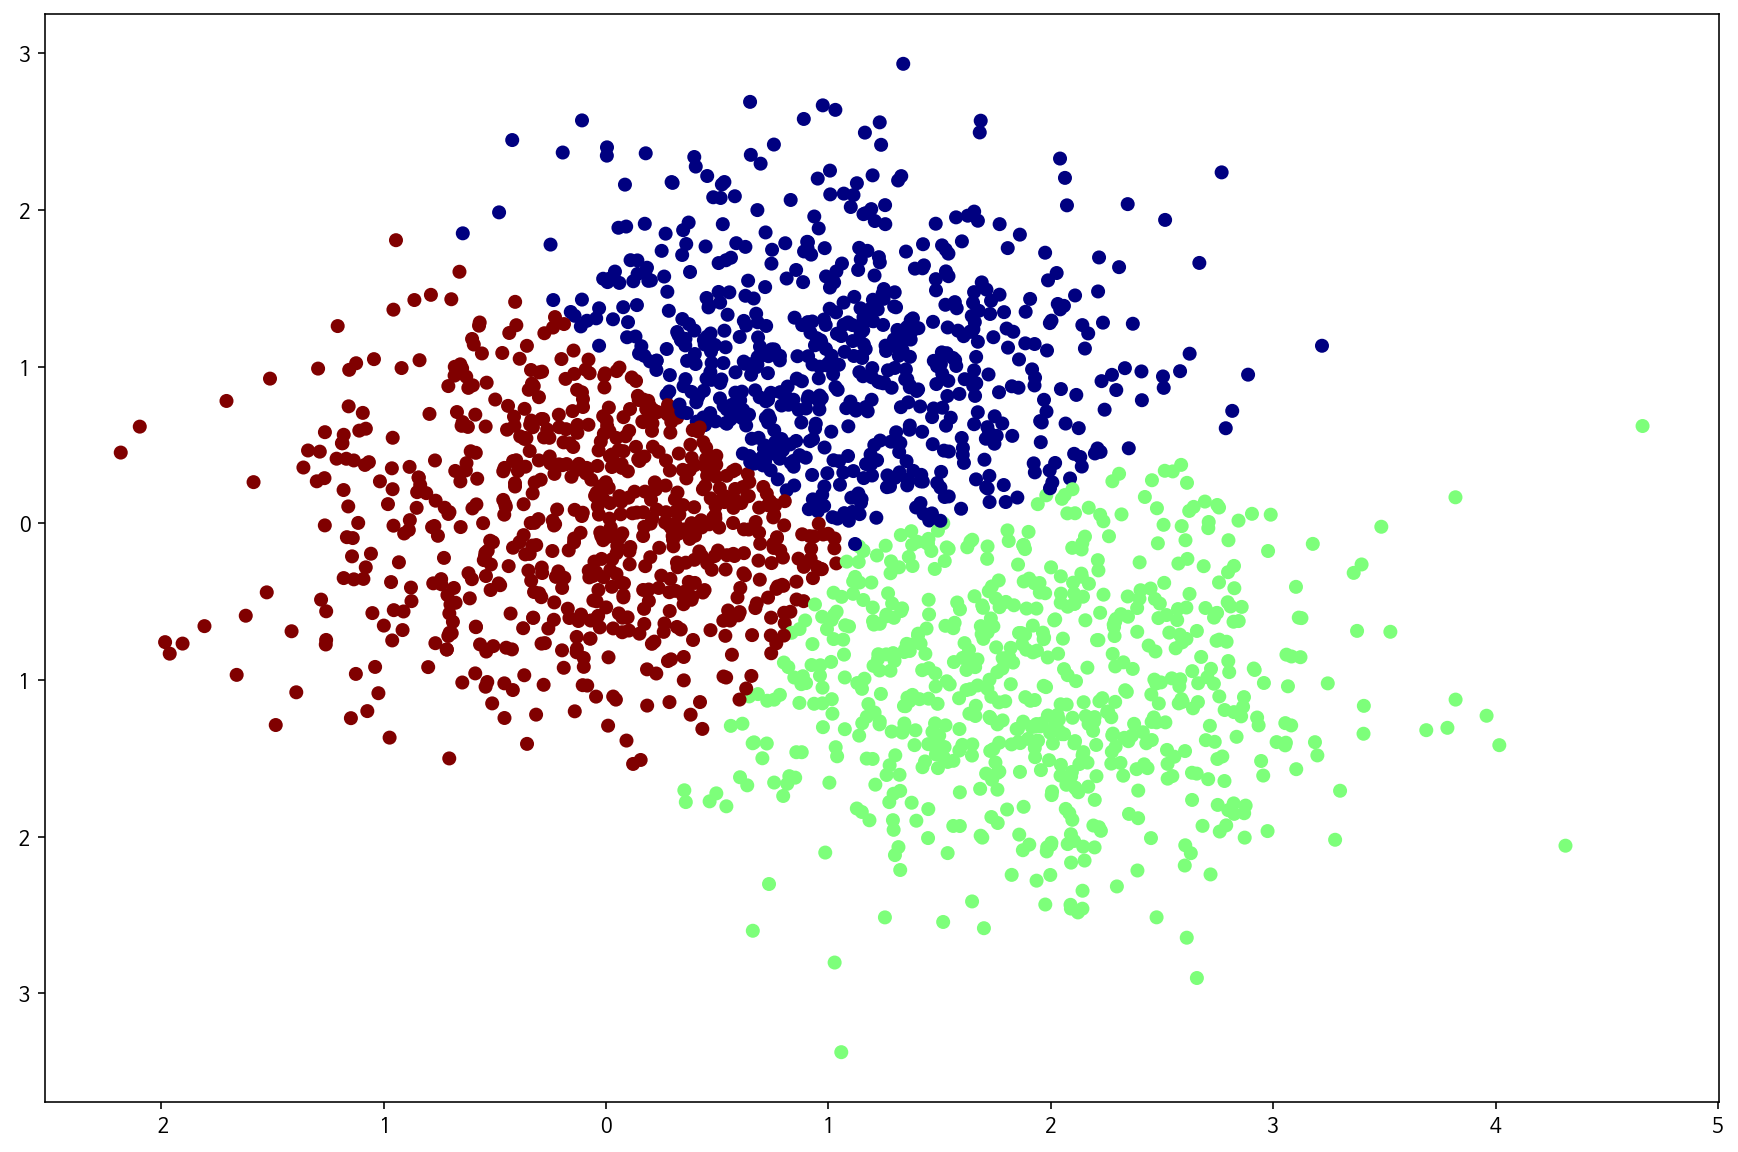

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data[:,0], data[:,1], c = cm(scaled_labels))

#### 또 다른 예제

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import pandas as pd 

In [ ]:
digits = load_digits()
data = digits.data
print("< Before scaling >")
print(data)
print("< After scaling >")
data = scale(data)
print(data)

< Before scaling >
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
< After scaling >
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [ ]:
labels_true = digits.target
n_samples, n_features = data.shape
clusters = np.unique(labels_true)
n_clusters = len(clusters)

print("n_samples : " + str(n_samples))
print("n_features : " + str(n_features))
print("n_clusters : " + str(n_clusters))
print("clusters : " + str(clusters))

n_samples : 1797
n_features : 64
n_clusters : 10
clusters : [0 1 2 3 4 5 6 7 8 9]


In [ ]:
estimator1 = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 10)
estimator1.fit(data)

estimator2 = KMeans(init = 'random', n_clusters = n_clusters, n_init = 10)
estimator2.fit(data)

labels_predict1 = estimator1.labels_
labels_predict2 = estimator2.labels_

In [ ]:
from sklearn import metrics

print("< clustering performance evaluation >\n")
print("1. clustering with initializing first centroids of clusters with k-means++ function ")
print('homogenity score : %.3f' 
      %(metrics.homogeneity_score(labels_true, labels_predict1)))
print('completeness score : %.3f' 
      %(metrics.completeness_score(labels_true, labels_predict1)))
print('v-measure score : %.3f \n'
     %(metrics.v_measure_score(labels_true, labels_predict1)))
print("2. clustering with initializing first centroids of clusters randomly ")
print('homogenity score : %.3f' 
      %(metrics.homogeneity_score(labels_true, labels_predict2)))
print('completeness score : %.3f' 
      %(metrics.completeness_score(labels_true, labels_predict2)))
print('v-measure score : %.3f \n'
     %(metrics.v_measure_score(labels_true, labels_predict2)))

< clustering performance evaluation >

1. clustering with initializing first centroids of clusters with k-means++ function 
homogenity score : 0.604
completeness score : 0.652
v-measure score : 0.627 

2. clustering with initializing first centroids of clusters randomly 
homogenity score : 0.596
completeness score : 0.642
v-measure score : 0.618 



# K-최근접 이웃

K-최근접 이웃이란?

In [ ]:
#1.  샘플에 대한 최근접 이웃을 찾아보면서 최근접 이웃에 대해 이해하기

# 라이브러리를 임포트
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# 데이터 로드-아이리스
iris=datasets.load_iris()
data=iris.data

# 표준화 객체 생성 - 특성 파악을 위한 작업
sd=StandardScaler()

# 특성을 표준화 함 - 특성 파악을 위한 작업
features_standardized=sd.fit_transform(data)

# k=2인 최근적 이웃 모델 생성-꽃받침, 꽃잎
nns=NearestNeighbors(n_neighbors=2).fit(features_standardized)

# 시험을 위한 샘플 생성
observation=[1,1,1,1]

# 샘플과 가장 가까운 이웃 인덱스와 거리를 조회
distances, indices=nns.kneighbors([observation]) # 거리와 인덱스를 리턴

# 최근접 이웃 확인
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

In [ ]:
nns_educlidean=NearestNeighbors(
    n_neighbors=2,
    metric='euclidean'
).fit(features_standardized)

In [ ]:
distances

array([[0.49140089, 0.74294782]])

In [ ]:
# 유클리디안 거리를 통해 각 샘플에 대한 3개의 최근접 이웃 조회
nns_educlidean=NearestNeighbors(n_neighbors=3,metric='euclidean').fit(features_standardized)

# 각 샘플 3개의 최근접 이웃 리스트
nns_with_self=nns_educlidean.kneighbors_graph(features_standardized).toarray() #최근접 이웃을 행렬로 리턴

# 최근접 이웃 리스트 조회, 이 때 1로 표시된 자기 자신은 제외
for i, x in enumerate(nns_with_self):
  x[i]=0

# 첫 번째 샘플에 대한 2개의 최근접 이웃 확인
nns_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

K-최근접 이웃 분류 모델

In [ ]:
# 라이브러리를 임포트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# 데이터 로드-아이리스
iris=datasets.load_iris()
X=iris.data
y=iris.target

# 표준화 객체 생성 - 특성 파악을 위한 작업
sd=StandardScaler()

# 특성을 표준화 함 - 특성 파악을 위한 작업
X_standardized=sd.fit_transform(X)

# k=5인 최근적 이웃 모델 생성-꽃받침, 꽃잎
knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_standardized, y)

# 시험을 위한 2개의 샘플 생성
observation=[
             [0.75, 0.75, 0.75, 0.75,],
             [1,1,1,1]
]


#  2개의 샘플이 속할 클래스 예측
knn.predict(observation)


array([1, 2])

In [ ]:
# 2개의 샘플이 세 클래스에 속할 확률을 조회

knn.predict_proba(observation)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

In [ ]:
# 라이브러리를 임포트합니다.
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets

# 데이터를 로드하고 두 개의 특성만 선택합니다.
boston = datasets.load_boston()
features = boston.data[:,0:2]
target = boston.target

# 최근접 회귀 모델을 만듭니다.
knn_regressor = KNeighborsRegressor(n_neighbors=10)

# 모델을 훈련합니다.
model = knn_regressor.fit(features, target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 첫 번째 샘플의 타깃 값을 예측하고 1000을 곱합니다.
model.predict(features[0:1])[0]*1000

32440.000000000004

In [ ]:
import numpy as np

indices = model.kneighbors(features[0:1], return_distance=False)
np.mean(target[indices]) * 1000

32440.000000000004

In [ ]:
# 최선의 이웃 개수 결정하기

# 라이브러리를 임포트합니다.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# KNN 분류기를 만듭니다.
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# 파이프라인을 만듭니다.
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

# 탐색 영역의 후보를 만듭니다.
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# 그리드 서치를 만듭니다.
classifier = GridSearchCV(
    pipe, search_space, cv=5, verbose=0).fit(features, target)

In [ ]:
# 최선의 이웃 개수 (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

In [ ]:
# 반지름 기반의 최근접 이웃 분류기 만들기

# 라이브러리를 임포트합니다.
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# 데이터를 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# 특성을 표준화합니다.
features_standardized = standardizer.fit_transform(features)

# 반지름 이웃 분류기를 훈련합니다.
rnn = RadiusNeighborsClassifier(
    radius=.5, n_jobs=-1).fit(features_standardized, target)

# 두 개의 샘플을 만듭니다.
new_observations = [[ 1,  1,  1,  1]]

# 두 샘플의 클래스를 예측합니다.
rnn.predict(new_observations)

array([2])

In [ ]:
# 반지름 이웃 분류기를 훈련합니다.
rnn = RadiusNeighborsClassifier(
    radius=.5, outlier_label=-1, n_jobs=-1).fit(features_standardized, target)

rnn.predict([[100, 100, 100, 100]])

## K-Nearest Neighbors(KNN) 분류 예

##### 예제 1 : Scikit-learn을 이용한 분류 예제 - Iris Data 분류

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
df = pd.DataFrame(X, columns = iris.feature_names)
print("< Iris Data >")
print("The number of sample data : " + str(len(df)))
print("The number of features of the data : " + str(len(df.columns)))
print("The labels of the data : " + str(np.unique(y)))
df

< Iris Data >
The number of sample data : 150
The number of features of the data : 4
The labels of the data : [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# split whole data set into train set and test set
# test_size : the proportion of the dataset to include in the test split. (0~1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 42)

print("The number of train data set : %d " %len(X_train))
print("The number of test data set : %d " %len(X_test))

The number of train data set : 100 
The number of test data set : 50 


In [ ]:
# instantiate learning model (k = 3)
estimator = KNeighborsClassifier(n_neighbors=3)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.980000000


In [ ]:
# parameter tuning with cross validation
# note! Using the test set for hyperparameter tuning can lead to overfitting.
# so use a subsest of the training set from the fitting process, it's validation set.
# we will use k-fold cross validation
# divide training set into k groups, or folds, of approximately equal size.
# the first fold is treated as a validation set, and the ethod is fit on the remaining k - 1 folds. 
# the misclassification rate is then computed on the observations in held-out fold. 
# this procedure is repeated k times
# note! cross-validation can be used to estimate the test error associated with a
# learning method in order to evaluate its performance, or to select the appropriate level of flexibility.

In [ ]:
# perform 10-fold cross validation 

# create odd list of k for kNN
myList = list(range(1,50))
neighbors = [ x for x in myList if x % 2 != 0]
print(neighbors)
print("The number of neighbors k is %d" %len(neighbors))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The number of neighbors k is 25


In [ ]:
# empty list that will hold cross validation scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    print("< k = %d >" %k)
    estimator = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator, X_train, y_train, cv = 10, scoring = 'accuracy')
    print("The scores of classification are \n" + str(scores))
    cv_scores.append(scores.mean()) # average error 
    print("The average score of scores is %.9f \n" %scores.mean())

< k = 1 >
The scores of classification are 
[1.  0.9 1.  0.8 0.8 1.  1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 3 >
The scores of classification are 
[0.9 1.  1.  0.7 0.9 1.  1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 5 >
The scores of classification are 
[1.  1.  1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 7 >
The scores of classification are 
[1.  0.9 1.  0.7 1.  0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 9 >
The scores of classification are 
[0.9 1.  1.  0.7 1.  0.9 1.  1.  1.  0.9]
The average score of scores is 0.940000000 

< k = 11 >
The scores of classification are 
[1.  0.9 1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.930000000 

< k = 13 >
The scores of classification are 
[0.9 0.9 1.  0.7 0.9 0.9 1.  1.  1.  0.9]
The average score of scores is 0.920000000 

< k = 15 >
The scores of classification are 
[1.  0.9 1.  0.7 0.9 1.  1.  1.  1. 

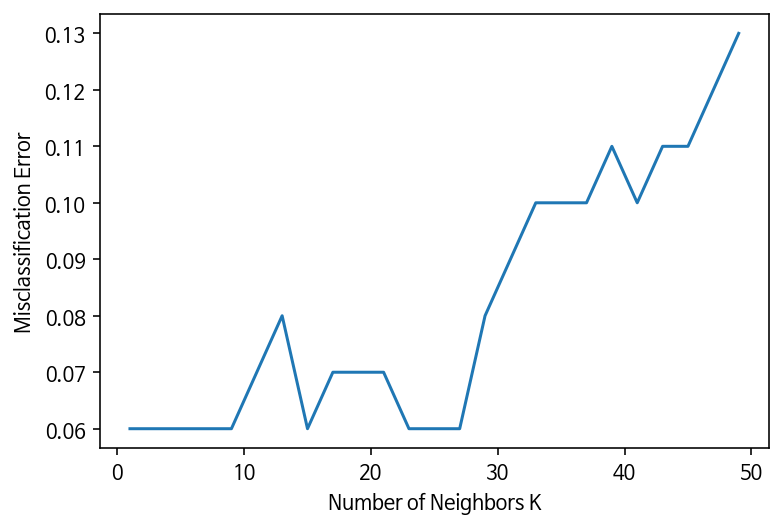

The optimal number of neighbors i is 1


In [ ]:
# changing to misclassification rate (a.k.a classification error)
# MSE = 1 - cross validation score
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# determining best k 
min_MSE = min(MSE)
index_of_min_MSE = MSE.index(min_MSE)
optimal_k = neighbors[index_of_min_MSE]
print ("The optimal number of neighbors i is %d" % optimal_k)

In [ ]:
# instantiate learning model (k = 7)
estimator = KNeighborsClassifier(n_neighbors=3)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.980000000


##### 예제 2 : Scikit-learn을 이용한 분류 예제 - Breast Cancer Data 분류

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import normalize

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

df = pd.DataFrame(X, columns = breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [ ]:
X = normalize(X)

In [ ]:
# split whole data set into train set and test set
# test_size : the proportion of the dataset to include in the test split. (0~1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 42)

print("The number of train data set : %d " %len(X_train))
print("The number of test data set : %d " %len(X_test))

The number of train data set : 381 
The number of test data set : 188 


In [ ]:
# instantiate learning model (k = 3)
estimator = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.925531915


In [ ]:
# perform 10-fold cross validation 

# create odd list of k for kNN
myList = list(range(1,100))
neighbors = [ x for x in myList if x % 2 != 0]
print(neighbors)
print("The number of neighbors k is %d" %len(neighbors))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
The number of neighbors k is 50


In [ ]:
# empty list that will hold cross validation scores
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    print("< k = %d >" %k)
    estimator = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator, X_train, y_train, cv = 10, scoring = 'accuracy')
    print("The scores of classification are \n" + str(scores))
    cv_scores.append(scores.mean()) # average error 
    print("The average score of scores is %.9f \n" %scores.mean())

< k = 1 >
The scores of classification are 
[0.92307692 0.8974359  0.92307692 0.97435897 0.92307692 0.86842105
 0.89189189 0.86486486 0.94594595 0.86486486]
The average score of scores is 0.907701426 

< k = 3 >
The scores of classification are 
[0.94871795 0.8974359  0.8974359  0.94871795 0.94871795 0.86842105
 0.91891892 0.91891892 0.91891892 0.81081081]
The average score of scores is 0.907701426 

< k = 5 >
The scores of classification are 
[0.97435897 0.8974359  0.8974359  0.97435897 0.92307692 0.86842105
 0.91891892 0.89189189 0.91891892 0.83783784]
The average score of scores is 0.910265529 

< k = 7 >
The scores of classification are 
[0.94871795 0.8974359  0.87179487 0.97435897 0.94871795 0.86842105
 0.91891892 0.89189189 0.94594595 0.83783784]
The average score of scores is 0.910404129 

< k = 9 >
The scores of classification are 
[0.97435897 0.8974359  0.84615385 0.97435897 0.94871795 0.84210526
 0.91891892 0.91891892 0.97297297 0.83783784]
The average score of scores is 0.91

The scores of classification are 
[0.94871795 0.82051282 0.87179487 0.8974359  0.8974359  0.86842105
 0.89189189 0.91891892 0.91891892 0.83783784]
The average score of scores is 0.887188606 

< k = 89 >
The scores of classification are 
[0.94871795 0.82051282 0.87179487 0.8974359  0.8974359  0.84210526
 0.89189189 0.91891892 0.91891892 0.83783784]
The average score of scores is 0.884557027 

< k = 91 >
The scores of classification are 
[0.94871795 0.82051282 0.87179487 0.8974359  0.8974359  0.81578947
 0.89189189 0.91891892 0.91891892 0.83783784]
The average score of scores is 0.881925448 

< k = 93 >
The scores of classification are 
[0.94871795 0.82051282 0.87179487 0.8974359  0.8974359  0.81578947
 0.89189189 0.91891892 0.91891892 0.83783784]
The average score of scores is 0.881925448 

< k = 95 >
The scores of classification are 
[0.94871795 0.82051282 0.87179487 0.8974359  0.8974359  0.81578947
 0.89189189 0.91891892 0.91891892 0.83783784]
The average score of scores is 0.88192544

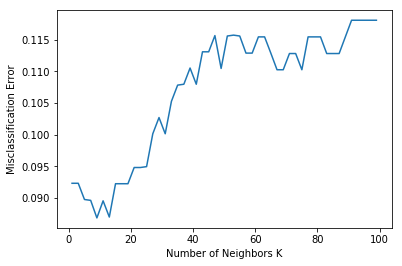

The optimal number of neighbors i is 9


In [ ]:
# changing to misclassification rate (a.k.a classification error)
# MSE = 1 - cross validation score
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# determining best k 
min_MSE = min(MSE)
index_of_min_MSE = MSE.index(min_MSE)
optimal_k = neighbors[index_of_min_MSE]
print ("The optimal number of neighbors i is %d" % optimal_k)

In [ ]:
# instantiate learning model (k = 3)
estimator = KNeighborsClassifier(n_neighbors=13)
# fitting the model
estimator.fit(X_train, y_train)
# predict the response
label_predict = estimator.predict(X_test)
# evaluate accuracy
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, label_predict))

The accuracy score of classification: 0.946808511


# PCA와 LDA

##붓꽃 데이터의 차원축소

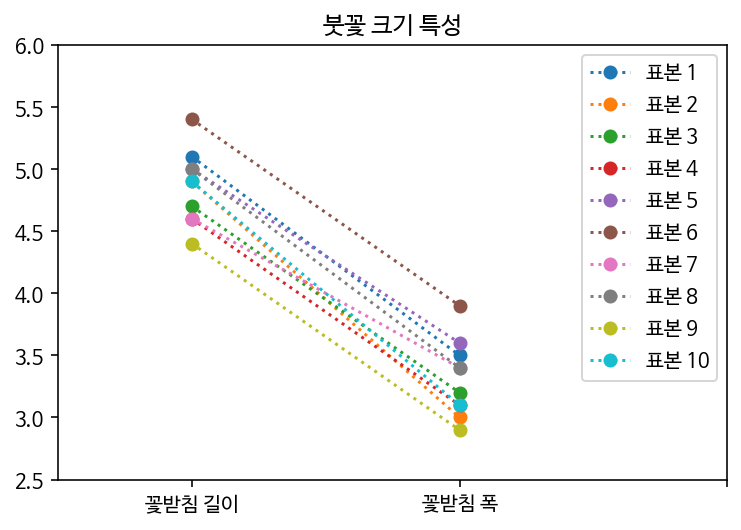

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


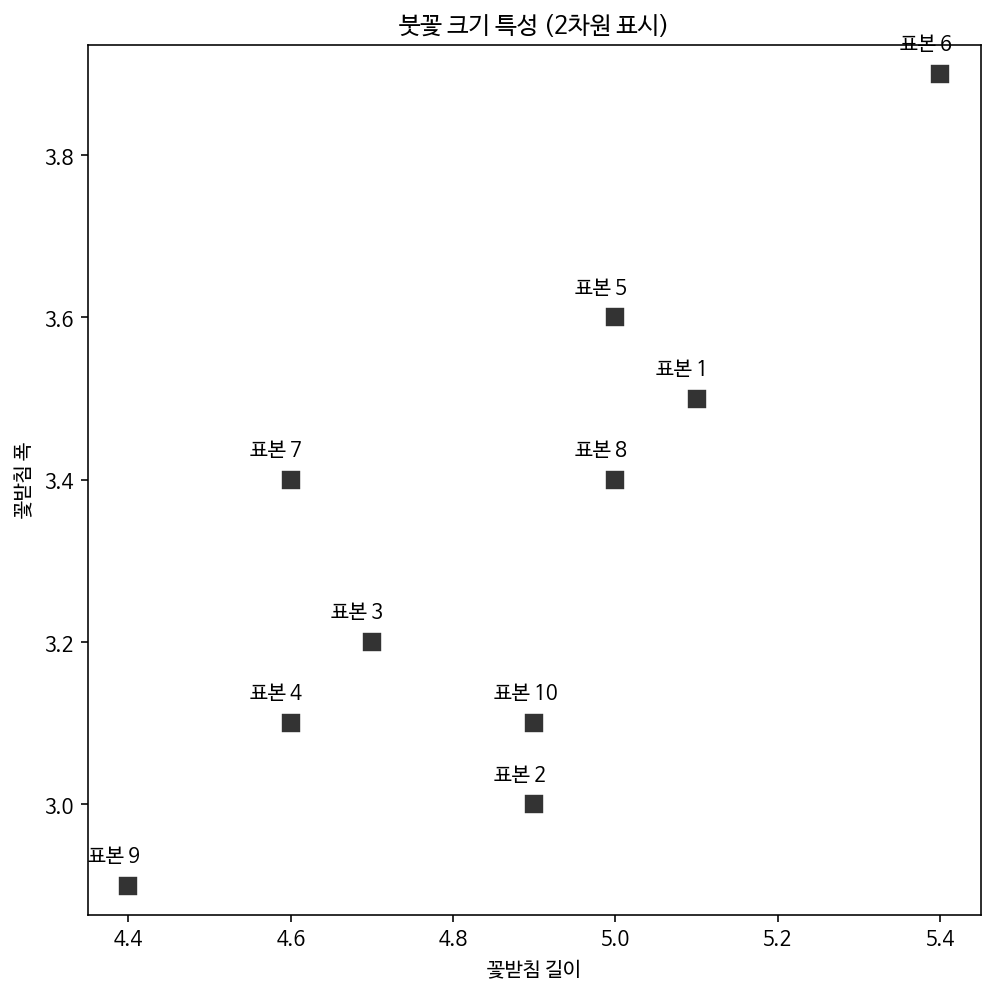

In [ ]:
import pandas as pd
import seaborn as sns

plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.axis("equal")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


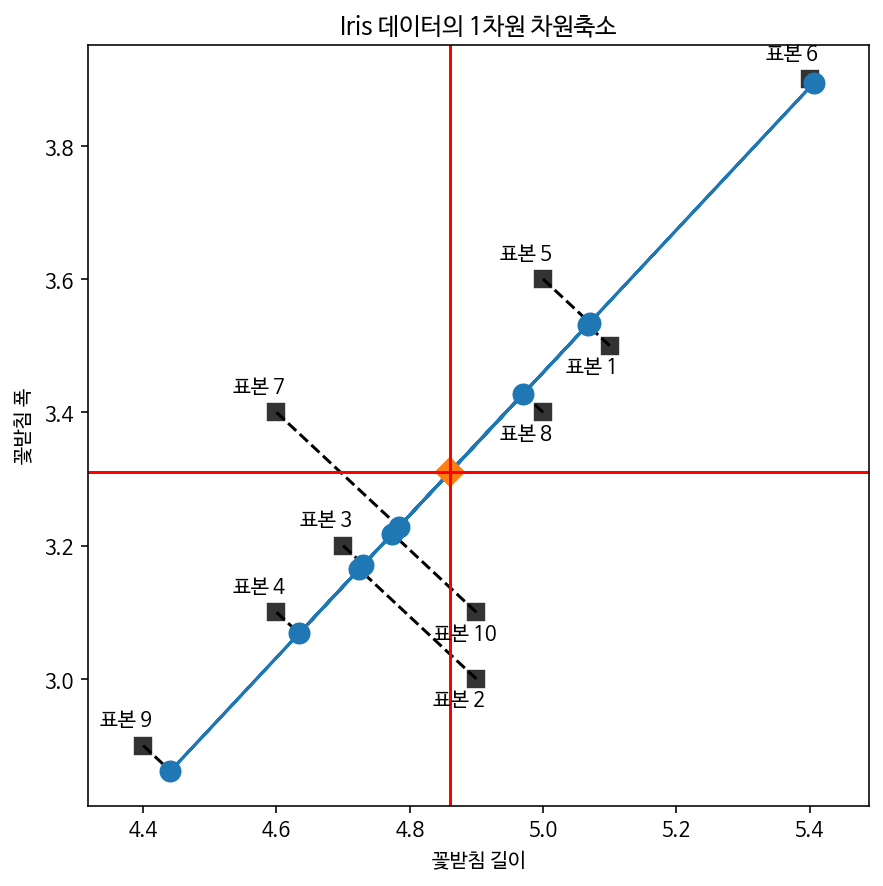

In [ ]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()


In [ ]:
pca1.mean_

array([4.86, 3.31])

In [ ]:
pca1.components_

array([[0.68305029, 0.73037134]])

In [ ]:
X0 = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [ ]:
VT[:, 0]

array([-0.68305029, -0.73037134])

In [ ]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)
W

array([0.17107711, 1.44192289])

In [ ]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [ ]:
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])

In [ ]:
X[7, :]

array([5. , 3.4])

In [ ]:
X_low[7]

array([0.16136046])

In [ ]:
pca1.components_ @ (X[7, :] - pca1.mean_)

array([0.16136046])

##이미지 PCA

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


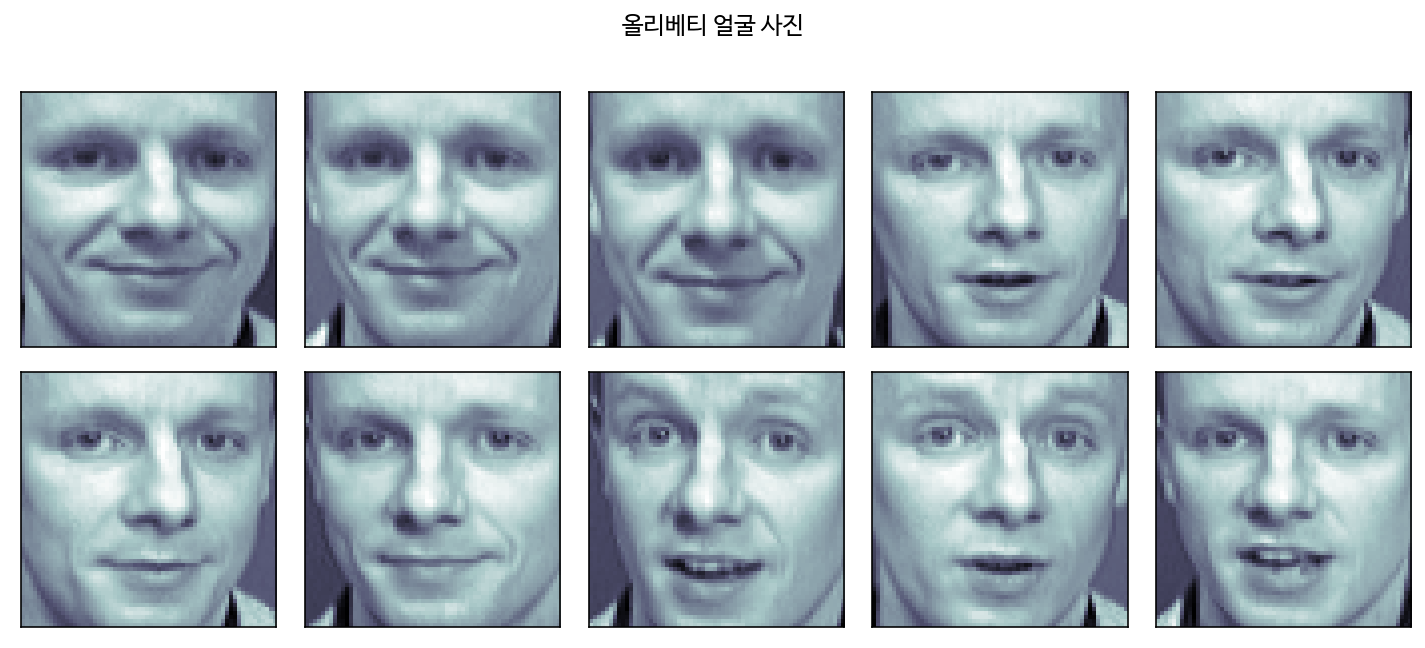

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

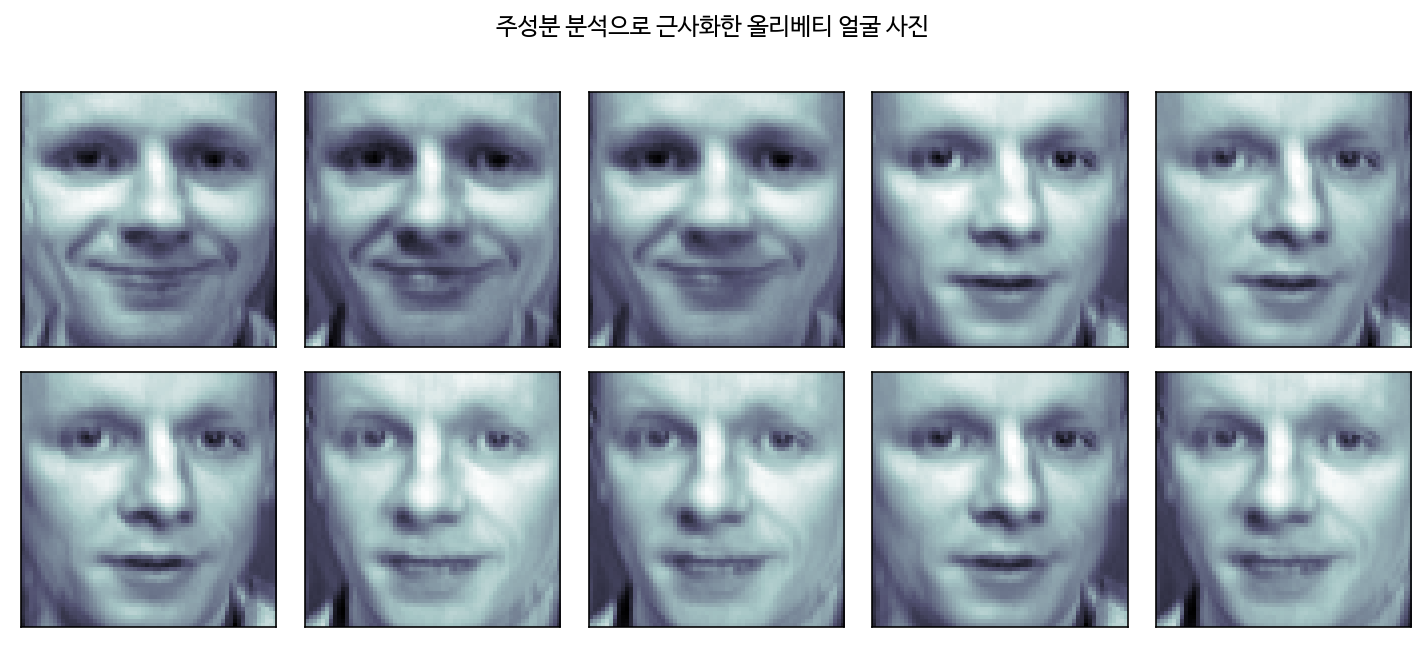

In [ ]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

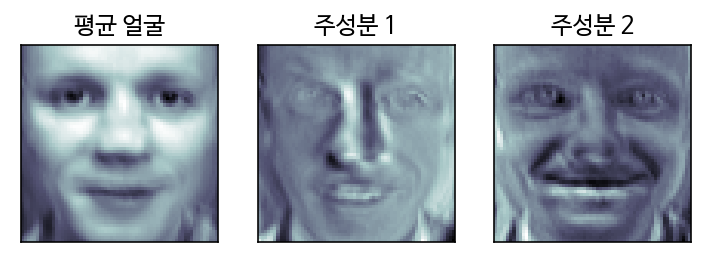

In [ ]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

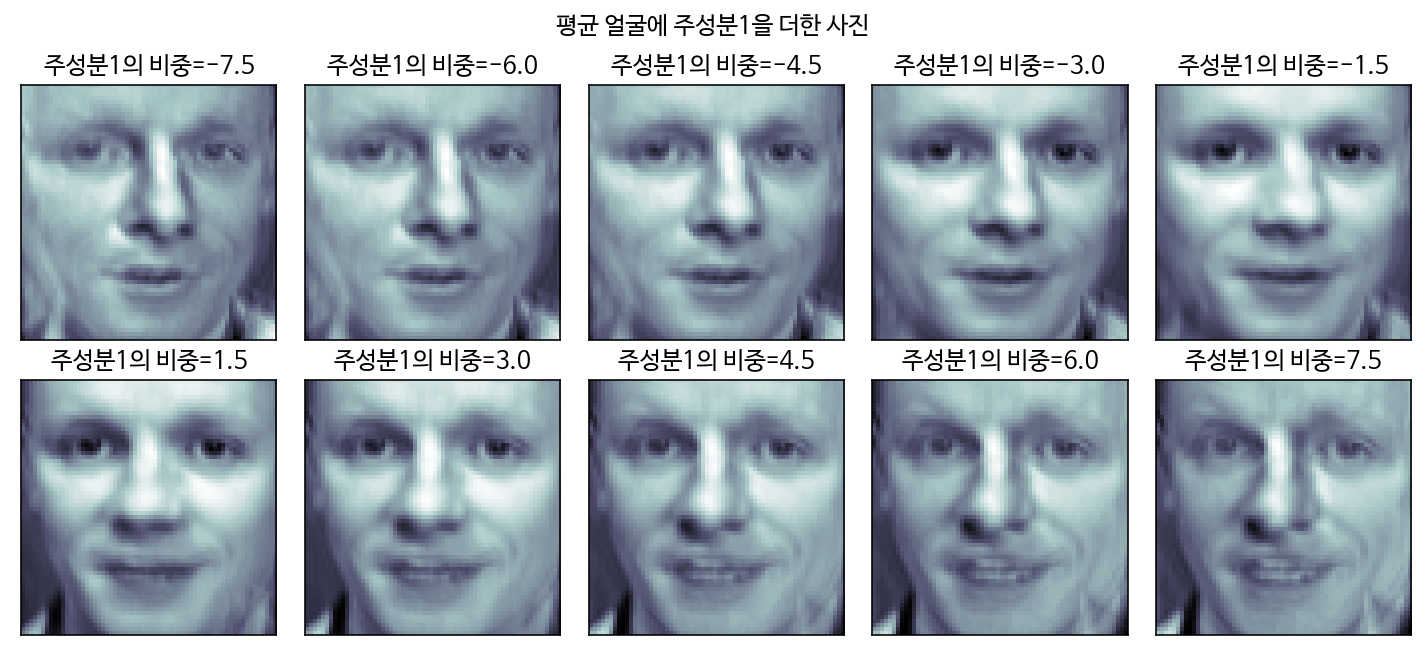

In [ ]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()


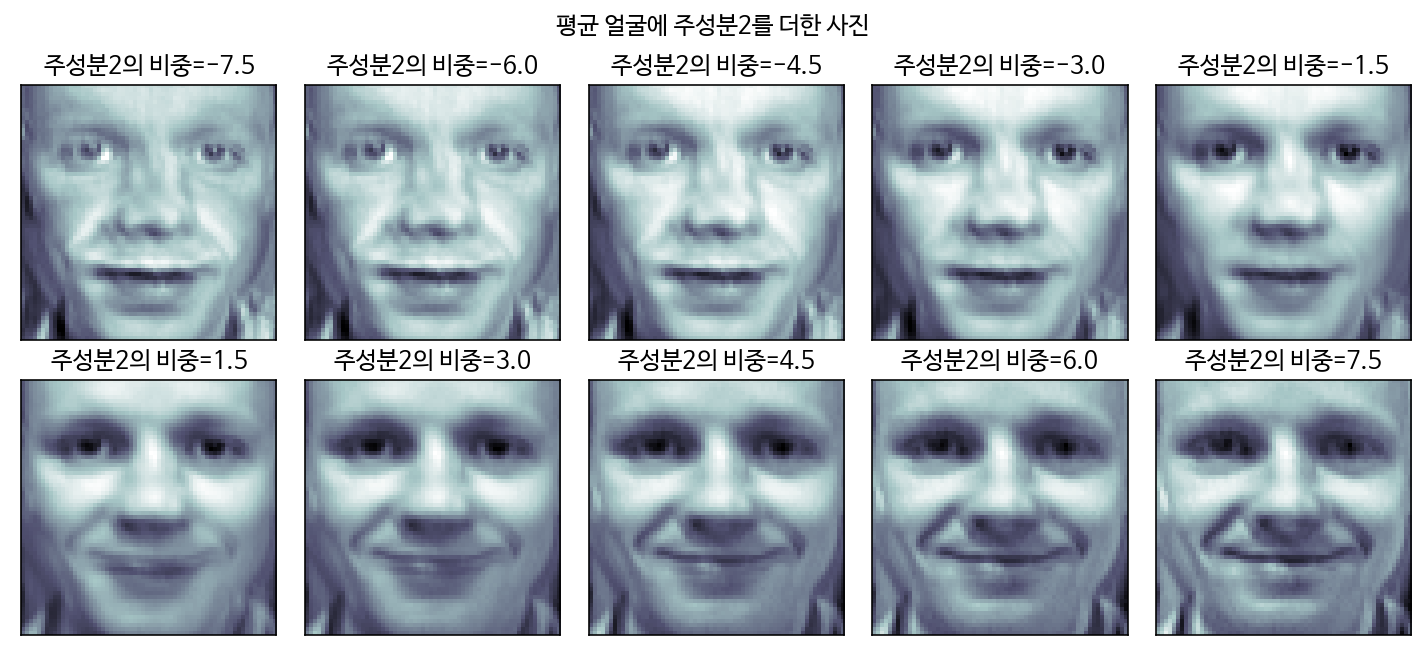

In [ ]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중={:.1f}".format(w))
plt.suptitle("평균 얼굴에 주성분2를 더한 사진")
plt.tight_layout()
plt.show()


##주식 가격의 PCA


In [ ]:
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


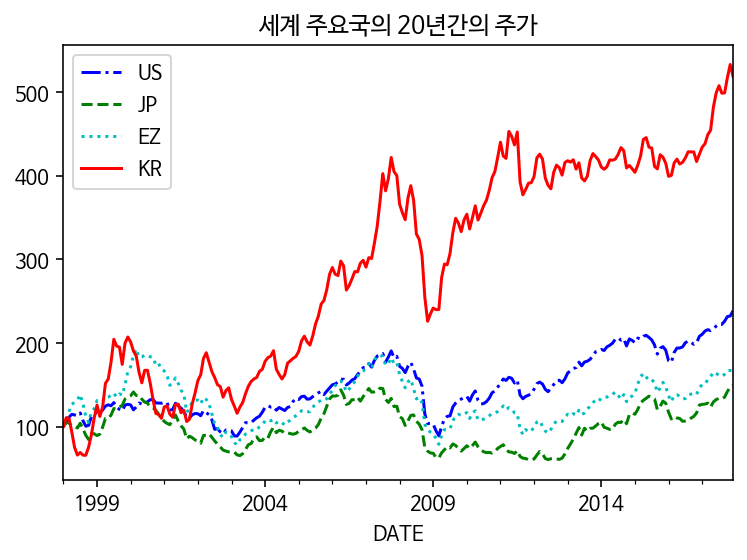

In [ ]:
from pandas.util.testing import assert_frame_equal
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime


symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()


In [ ]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])


DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375382  -21.857069  -30.647655
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


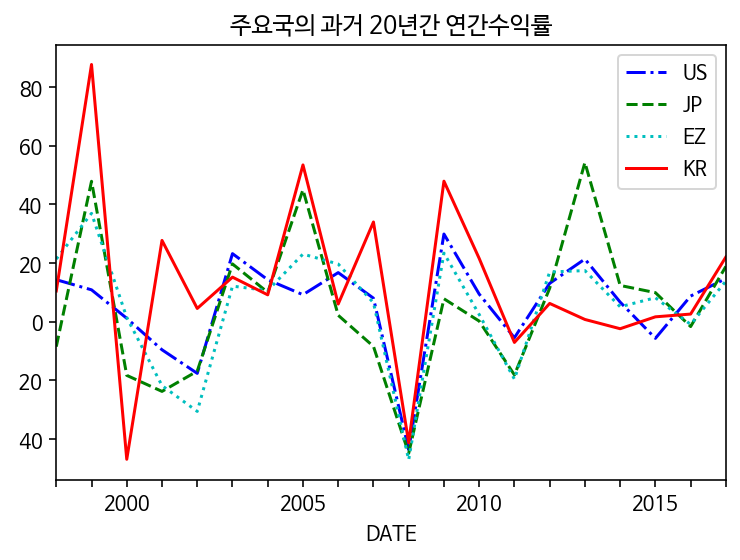

In [ ]:
df.T.plot(style=styles)
plt.title("주요국의 과거 20년간 연간수익률")
plt.xticks(df.columns)
plt.show()


In [ ]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)
w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,


array([[-33.41485628],
       [-20.95067425],
       [-26.90451817],
       [ 81.27004869]])

In [ ]:
m = pca2.mean_
m


array([  9.35024903,  45.7748003 , -15.71778474,  -6.91967078,
       -15.20105431,  17.48753184,  10.95573114,  32.60608959,
        11.08050557,   9.94633446, -44.28098506,  27.17915619,
         8.34448416, -12.63832446,  11.84865355,  23.38728371,
         5.36675995,   3.4496374 ,   2.12193691,  17.2907071 ])

In [ ]:
p1 = pca2.components_[0]
p1

array([-0.00267523,  0.5365477 , -0.39468731,  0.41151267,  0.23991394,
       -0.03151781, -0.02578233,  0.2784153 , -0.07252811,  0.28108186,
        0.03493116,  0.23660856,  0.15406498,  0.05803737, -0.07042953,
       -0.2541223 , -0.09159712, -0.01157291, -0.00236887,  0.06011031])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


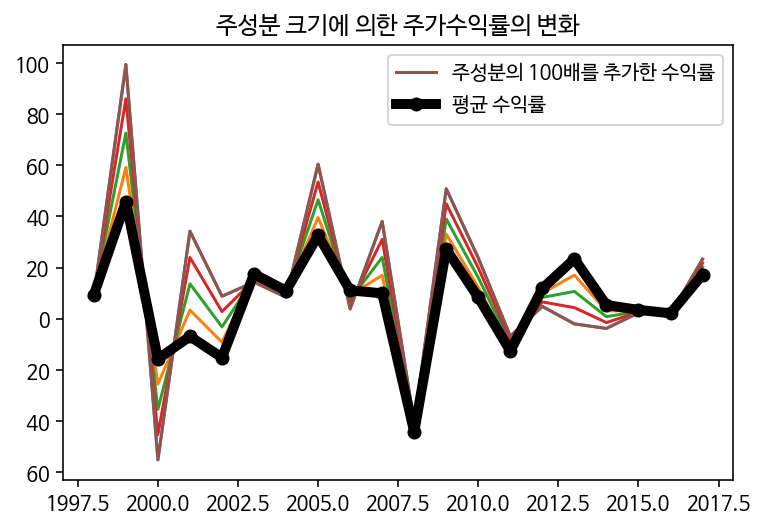

In [ ]:
xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()


## 11.4 데이터를 사용한 실습

### 11.4.1 필요한 패키지 import

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 11.4.2 원본 데이터 확인

In [ ]:
data = datasets.load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
x = data.data[:, :2] 
y = data.target
target_names = data.target_names
target_names

array(['malignant', 'benign'], dtype='<U9')

- malignant : 악성의 
- benign : 양성의

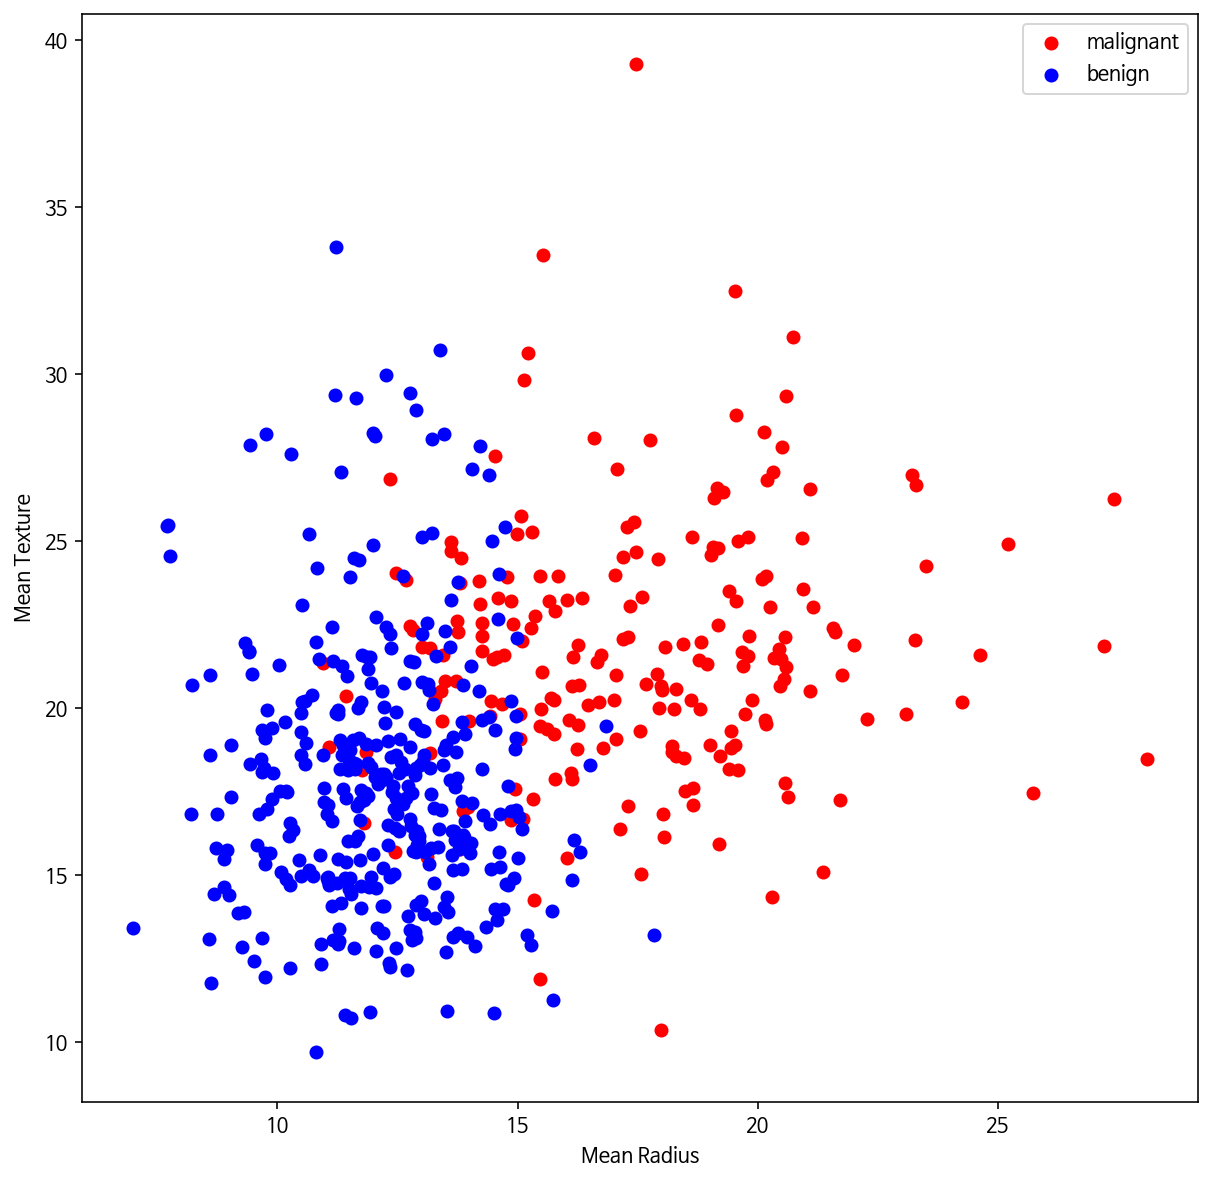

In [ ]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, label=target_name)

plt.legend()
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

### 11.4.3 PCA

In [ ]:
x = data.data
y = data.target
target_names = data.target_names

In [ ]:
pca = PCA(n_components=2)
x_p = pca.fit(x).transform(x)
print('가장 큰 주성분 두 개에 대한 분산: %s' % str(pca.explained_variance_ratio_))

가장 큰 주성분 두 개에 대한 분산: [0.98204467 0.01617649]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


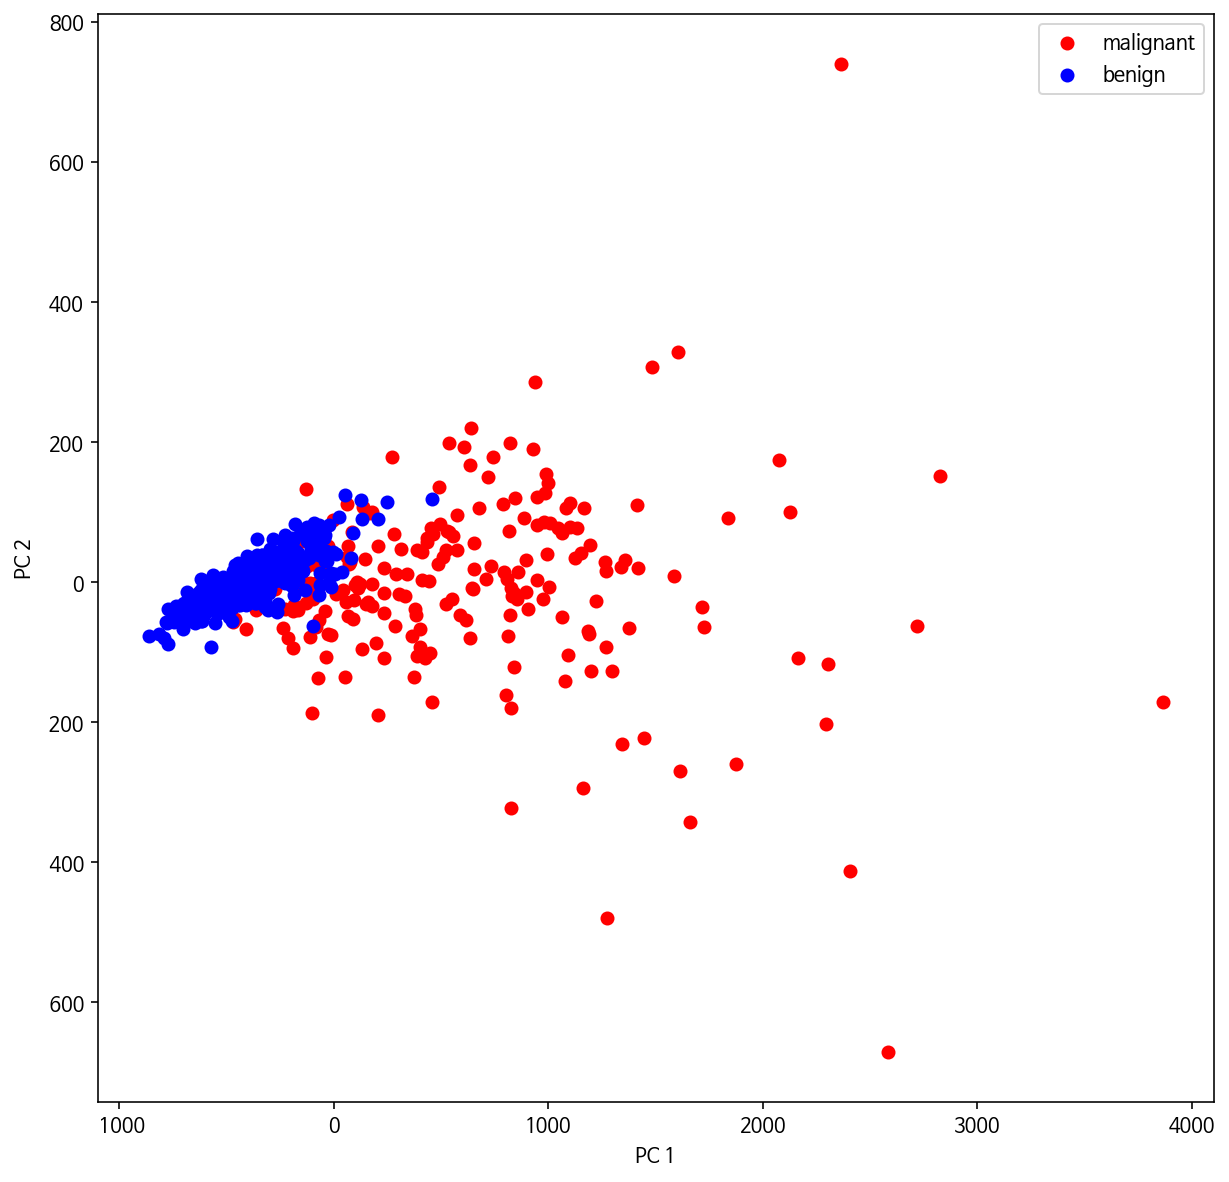

In [ ]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_p[y == i, 0], x_p[y == i, 1], color=color, label=target_name)

plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### 11.4.4 LDA

In [ ]:
x = data.data
y = data.target
target_names = data.target_names

In [ ]:
lda = LinearDiscriminantAnalysis(solver='eigen', n_components=1)
x_l = lda.fit(x, y).transform(x)

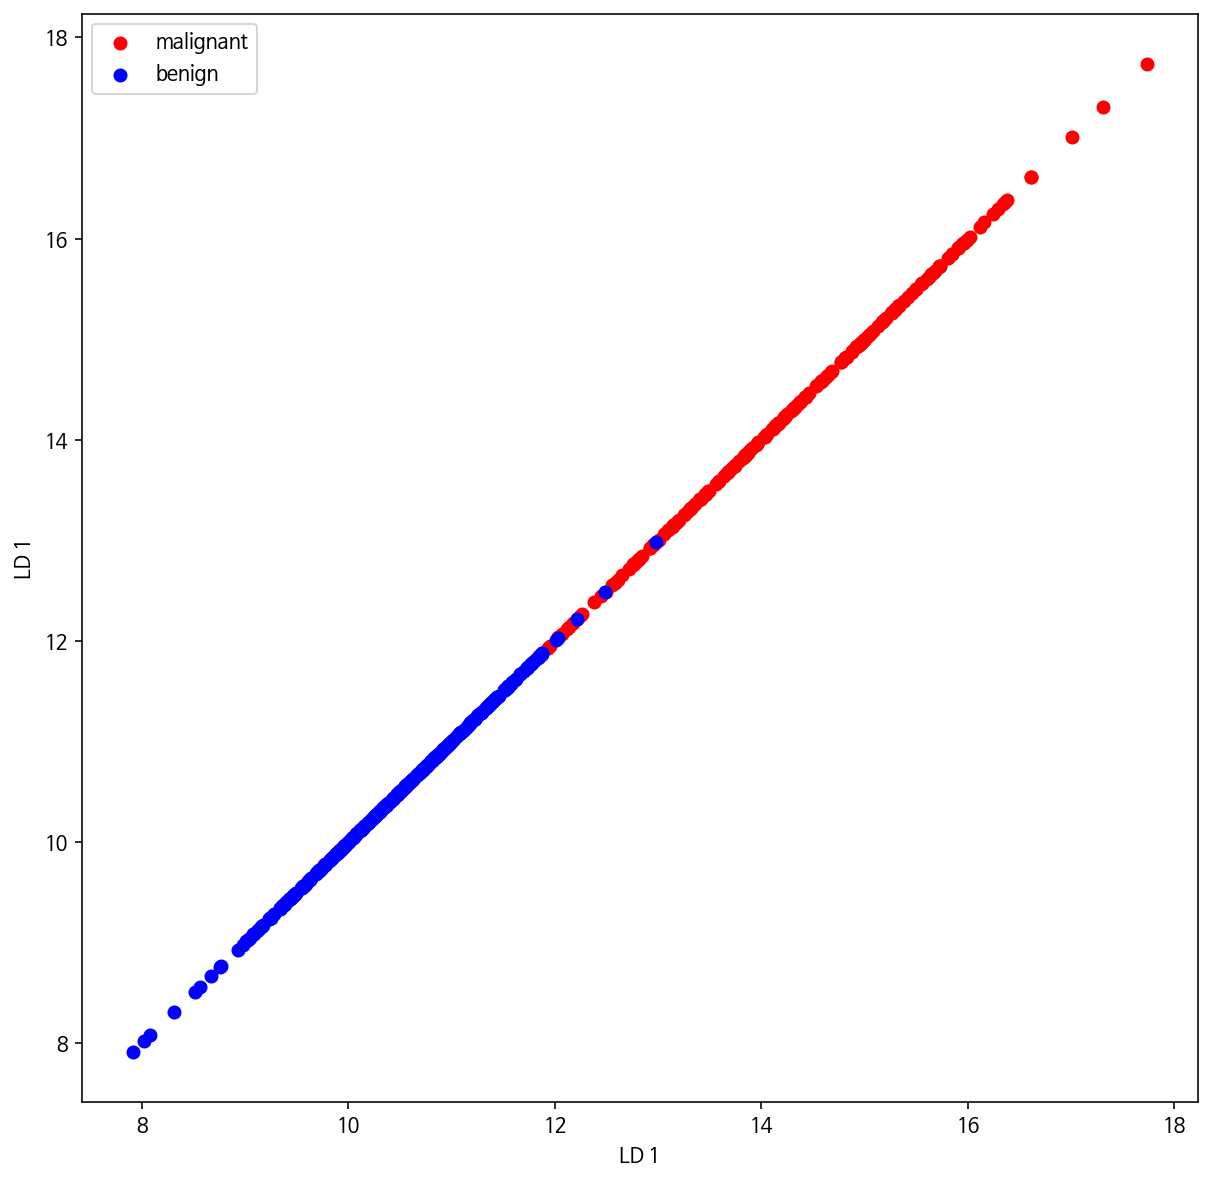

In [ ]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_l[y == i, 0], x_l[y == i, 0], color=color, label=target_name) # 수정 후

plt.legend()
plt.xlabel('LD 1')
plt.ylabel('LD 1') # 1개 component 이므로 LD1으로 동일
plt.show()

#특이값 분해(SVD : Singular Value Decomposition


In [ ]:
from numpy.linalg import svd

A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)

U

array([[-4.08248290e-01,  8.94427191e-01, -1.82574186e-01],
       [-8.16496581e-01, -4.47213595e-01, -3.65148372e-01],
       [-4.08248290e-01, -2.06937879e-16,  9.12870929e-01]])

In [ ]:
S

array([3.46410162, 3.16227766])

In [ ]:
np.diag(S, 1)[:, 1:]

array([[3.46410162, 0.        ],
       [0.        , 3.16227766],
       [0.        , 0.        ]])

In [ ]:
VT

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
U @ np.diag(S, 1)[:, 1:] @ VT

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

In [ ]:
U2, S2, VT2 = svd(A, full_matrices=False)

U2

array([[-4.08248290e-01,  8.94427191e-01],
       [-8.16496581e-01, -4.47213595e-01],
       [-4.08248290e-01, -2.06937879e-16]])

In [ ]:
S2

array([3.46410162, 3.16227766])

In [ ]:
VT2

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
U2 @ np.diag(S2) @ VT2

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

In [ ]:
w, V = np.linalg.eig(A.T @ A)

w  # A.T A의 고윳값

array([12., 10.])

In [ ]:
S ** 2  # A의 특잇값의 제곱

array([12., 10.])

In [ ]:
V  # A.T A의 고유벡터

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
VT.T  # A의 오른쪽 특이벡터

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

# 연관규칙

1.Apriori

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 패키지 임포트
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd

# 데이터 셋 생성
dataset=[['사과','치즈','생수'],
['생수','호두','치즈','고등어'],
['수박','사과','생수'],
['생수','호두','치즈','옥수수']]

dataset

[['사과', '치즈', '생수'],
 ['생수', '호두', '치즈', '고등어'],
 ['수박', '사과', '생수'],
 ['생수', '호두', '치즈', '옥수수']]

In [ ]:
te=TransactionEncoder()

te_ary=te.fit(dataset).transform(dataset)

In [ ]:
df=pd.DataFrame(te_ary, columns=te.columns_)

df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [ ]:
frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(생수, 치즈)"
6,0.50,"(생수, 호두)"
7,0.50,"(치즈, 호두)"
8,0.50,"(생수, 호두, 치즈)"


In [ ]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
4,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
7,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
8,"(생수, 호두)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(생수, 치즈)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5


##빈발 아이템

###FP-Growth* Algorithm (Frequent-Pattern Growth)


In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import mlxtend
import numpy as np
import pandas as pd

data = np.array([
                 ['휴지','물티슈','샴푸'],
                 ['수세미','물티슈','비누'],
                 ['휴지','수세미','물티슈','비누'],
                 ['수세미','비누']
])

df_data = pd.DataFrame(data)
df_data

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(data).transform(data)

df = pd.DataFrame(te_array, columns=te.columns_)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_

,물티슈,비누,샴푸,수세미,휴지
0,True,False,True,False,True
1,True,True,False,True,False
2,True,True,False,True,True
3,False,True,False,True,False


In [ ]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.75,(물티슈)
1,0.50,(휴지)
2,0.75,(수세미)
3,0.75,(비누)
4,0.50,"(물티슈, 비누)"
5,0.50,"(물티슈, 수세미)"
6,0.50,"(물티슈, 수세미, 비누)"
7,0.50,"(휴지, 물티슈)"
8,0.75,"(수세미, 비누)"


#성능 평가


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [ ]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]])

In [ ]:
confusion_matrix(y_true, y_pred, labels=[1, 0])

array([[3, 1],
       [0, 2]])

In [ ]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [ ]:
y_true = [0, 0, 1, 1, 2, 2, 2]
y_pred = [0, 0, 1, 2, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         2
     class 1       0.50      0.50      0.50         2
     class 2       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.72      0.72      0.72         7
weighted avg       0.71      0.71      0.71         7



##ROC 커브

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)


/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/d

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0


In [ ]:
confusion_matrix(y, y_hat, labels=[1, 0])

recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)


recall = 0.75
fallout = 0.125


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds


(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.36316277,  2.36316277,  1.21967832,  0.37829565,  0.09428499,
        -0.76588836, -0.92693183, -4.11896895]))

In [ ]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds


(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([1.9139748 , 0.9139748 , 0.77200693, 0.59346197, 0.5235538 ,
        0.31736921, 0.28354759, 0.01600107]))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

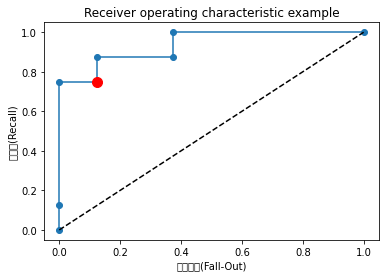

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

In [ ]:
print(confusion_matrix(y, y_hat1))
print(confusion_matrix(y, y_hat2))
print(classification_report(y, model1.predict(X)))
print(classification_report(y, model2.predict(X)))


[[940   3]
 [ 30  27]]
[[940   3]
 [ 30  27]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_

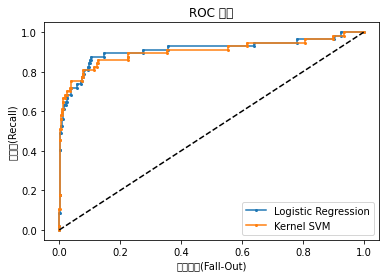

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC 커브')
plt.show()


In [ ]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)


(0.9112202563673234, 0.9037227214377407)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_

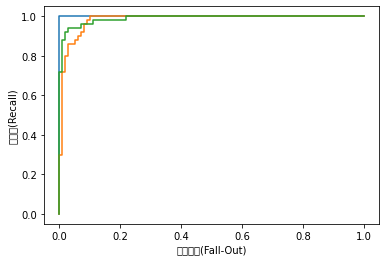

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2]) 

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()
